<a href="https://colab.research.google.com/github/lyc760214/teaching_and_reporting/blob/master/20190619_handwritten_number_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt


In [0]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

print(np.shape(x_train), np.shape(y_train), np.shape(x_test), np.shape(y_test))

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


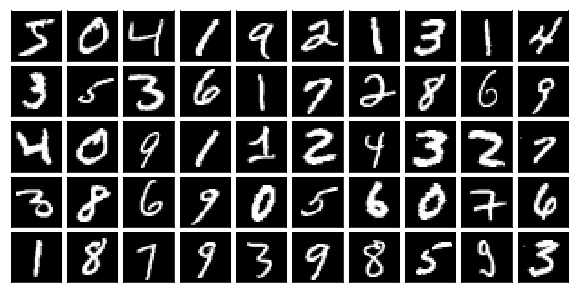

In [0]:

fig, axes = plt.subplots(5, 10, figsize=(10, 5.0), 
                        subplot_kw={'xticks':[],  'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))



for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i].reshape(28,28), cmap='binary_r')

# Scikit-Learn
## Support Vector Machine (SVM)

You need to reshape the 2D picture to 1D array for the model in Scikit-learn.

In [0]:
x_train_1D = x_train.reshape((len(x_train), -1))
x_test_1D = x_test.reshape((len(x_test), -1))

You can use the SVC module to help you to create a model for multi-classification.

In [0]:
from sklearn.svm import SVC

svm_model = SVC(gamma=0.01, C=2)
svm_model.fit(x_train_1D[:1000], y_train[:1000])
#svm_model.fit(x_train_1D, y_train)
svm_model.score(x_test_1D[:500], y_test[:500])
#svm_model.score(x_test_1D, y_test)

0.098

## Random Forest (RF)
You also can use the other module called "Random Forest" to create a prediction model.

In [0]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 1000)
rf_model.fit(x_train_1D[:1000], y_train[:1000])
#rf_model.fit(x_train_1D, y_train)
rf_model.score(x_test_1D[:500], y_test[:500])
#rf_model.score(x_test_1D, y_test)

0.87

We can see that the results of the SVM and the RF are not very good because these methods must use processed data.

## Principal Component Analysis (PCA)

The PCA is a method of processing raw data that can extract data and reduce dimensionality.
Especially for SVM, this method will seriously increase the time it takes to train the model in the face of a larger amount of data.

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=150, svd_solver='randomized',whiten=True)
pca.fit(x_train_1D[:1000])
x_train_pca = pca.transform(x_train_1D[:1000])
x_test_pca = pca.transform(x_test_1D[:500])
#pca.fit(x_train_1D)
#x_train_pca = pca.transform(x_train)
#x_test_pca = pca.transform(x_test[:500])

Now, we can rebuild the prediction models of the SVM and the RF.

In [0]:
svm_model = SVC(gamma=0.001, C=1)
svm_model.fit(x_train_pca, y_train[:1000])
print("SVM:",svm_model.score(x_test_pca, y_test[:500]))

rf_model = RandomForestClassifier(n_estimators = 1000)
rf_model.fit(x_train_pca, y_train[:1000])
print("RF :",rf_model.score(x_test_pca, y_test[:500]))

SVM: 0.828
RF : 0.828


# Tensorflow and Keras
## Convolutional Neural Network (CNN)
Artificial neural networks is another way to recognize the handwritten digits.
Among them, the convolutional neural network is the good approach for this problem.


In [0]:
import tensorflow as tf

main_input = tf.keras.layers.Input(shape=(28, 28), name='main_input')
input_reshape = tf.keras.layers.Reshape((28, 28, 1))(main_input)
conv_layer = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=1, padding='same', activation='relu')(input_reshape)
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=1, padding='same')(conv_layer)
flat_layer = tf.keras.layers.Flatten()(pool_layer)
drop_layer = tf.keras.layers.Dropout(0.3)(flat_layer)
main_output = tf.keras.layers.Dense(units=10, activation='softmax', name='main_output')(drop_layer)

cnn_model = tf.keras.models.Model(inputs=[main_input], outputs=[main_output])
cnn_model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=['accuracy'])
cnn_model.summary()


Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape_7 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 50176)             0         
_________________________________________________________________
main_output (Dense)          (None, 10)                5017

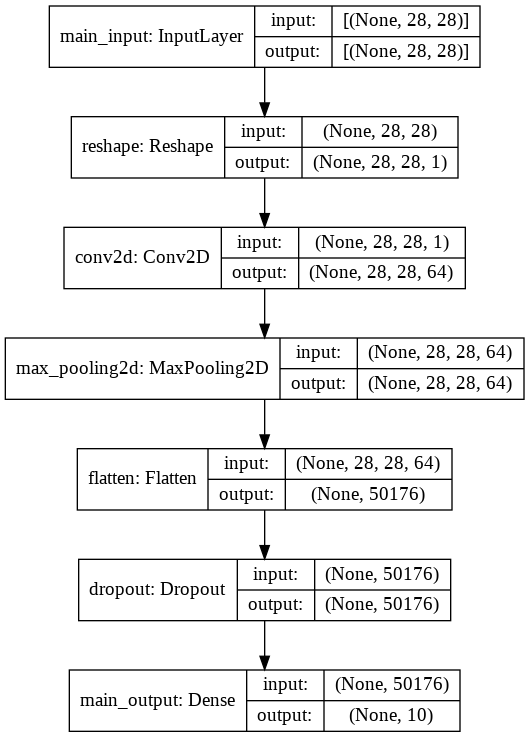

In [0]:
tf.keras.utils.plot_model(cnn_model, show_shapes=True, show_layer_names=True)


In [0]:
cnn_model.fit(x_train[:1000], y_train[:1000], batch_size=64, epochs=5, validation_split=0.1)

Train on 900 samples, validate on 100 samples
Epoch 1/5
900/900 [==============================] - 2s 2ms/sample - loss: 106.0741 - acc: 0.3811 - val_loss: 27.6958 - val_acc: 0.6700
Epoch 2/5
900/900 [==============================] - 2s 2ms/sample - loss: 15.6461 - acc: 0.8067 - val_loss: 10.4542 - val_acc: 0.8600
Epoch 3/5
900/900 [==============================] - 2s 2ms/sample - loss: 6.4543 - acc: 0.9067 - val_loss: 7.1907 - val_acc: 0.9300
Epoch 4/5
900/900 [==============================] - 2s 2ms/sample - loss: 2.7233 - acc: 0.9444 - val_loss: 7.2418 - val_acc: 0.8800
Epoch 5/5
900/900 [==============================] - 2s 2ms/sample - loss: 1.1433 - acc: 0.9689 - val_loss: 6.9973 - val_acc: 0.9100


In [0]:
cnn_model.evaluate(x_test[:500], y_test[:500])

500/500 [==============================] - 0s 392us/sample - loss: 5.6006 - acc: 0.8940


[5.600563441276551, 0.894]